In [86]:
%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
#suppressing FutureWarnings, but retain visibility on all other warnings.
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [88]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

def fetch_data(fname='wine.csv'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [89]:
FEATURES  = [
    "class",
    "alcohol", 
    "malic_acid", 
    "ash", 
    "alcalinity_of_ash", 
    "magnesium", 
    "total_phenols", 
    "flavanoids", 
    "nonflavanoid_phenols", 
    "proanthocyanins", 
    "color_intensity", 
    "hue", 
    "od280_od315", 
    "proline"
]

CLASS_LABEL_MAP = {
    1: "cultivar 1",
    2: "cultivar 2",
    3: "cultivar 3",
}
                   
# Read the data into a DataFrame
df = pd.read_csv(DATA, header=None, names=FEATURES)

# Convert class labels into text
# df['class'] = df['class'].map(CLASS_LABEL_MAP)

# Describe the dataset
print(df.describe(include='all'))

            class     alcohol  malic_acid         ash  alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

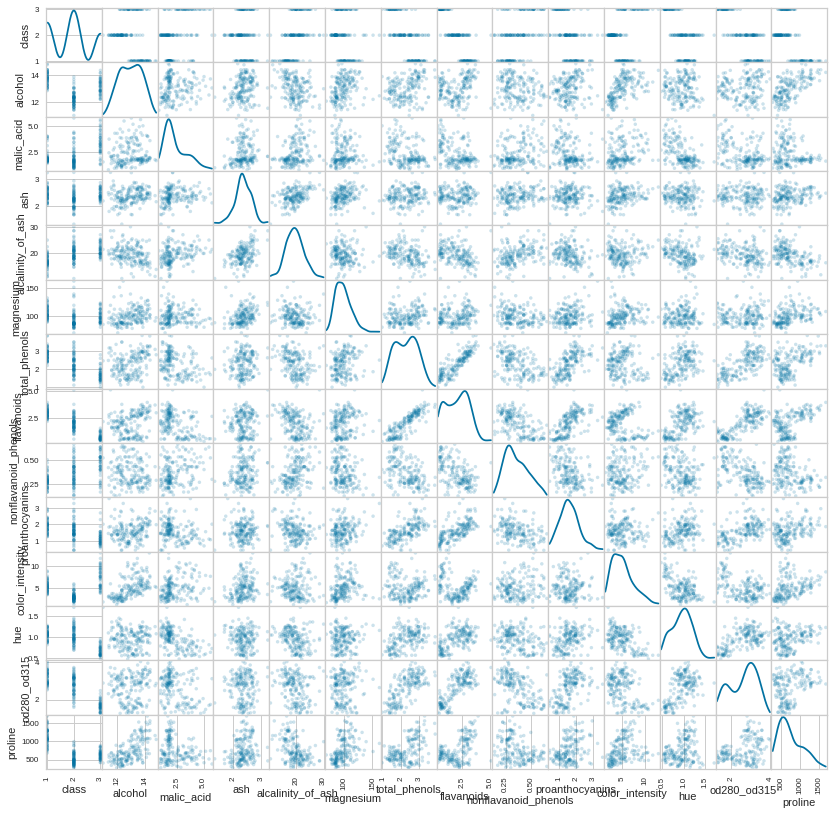

In [90]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')
plt.show() 

In [91]:
# Extract our X and y data
X = df[FEATURES[2:]]
y = df.alcohol

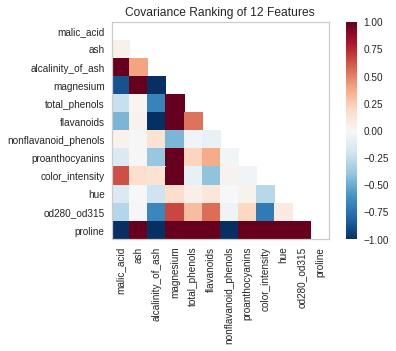

<AxesSubplot:title={'center':'Covariance Ranking of 12 Features'}>

In [92]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
covarian_vis = Rank2D(features=FEATURES[2:], algorithm='covariance')

covarian_vis.fit(X, y)                # Fit the data
covarian_vis.transform(X)             # Transform the data
covarian_vis.show()                   # Draw/show/poof the data

In [93]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [99]:
#dropping class from df
df = df.drop("class", inplace = False)

AttributeError: 'NoneType' object has no attribute 'drop'

In [95]:
#Classification Model

In [96]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

In [97]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def score_model(X_train, y_train, estimator, **kwargs):
    """
    Test various estimators.
    """
    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train, **kwargs)  
    
    expected  = y_train
    predicted = model.predict(X_train)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    

models = [
    SVC(gamma='auto'), 
    NuSVC(gamma='auto'), 
    LinearSVC(),  
    KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), 
    LogisticRegressionCV(cv=3), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_test, y_test, model)